In [1]:
import matplotlib.pyplot as plt 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import vice 
import numpy as np 

In [14]:
def setup_axis_time(): 
    r""" 
    Setup a single subplot on which to plot the running total enrichment 
    of nitrogen as a function of age from a single stellar population. 
    """ 
    fig = plt.figure(figsize = (7, 7), facecolor = "white") 
    ax = fig.add_subplot(111) 
    ax.set_xscale("log") 
    ax.set_xlabel("Age [Gyr]") 
    ax.set_ylabel(r"$M_x/M_{x,\text{final}}$") 
    plots.mpltoolkit.xticklabel_formatter(ax) 
    ax.set_xlim([0.005, 20]) 
    ax.set_ylim([-0.05, 1.05])
    return ax 

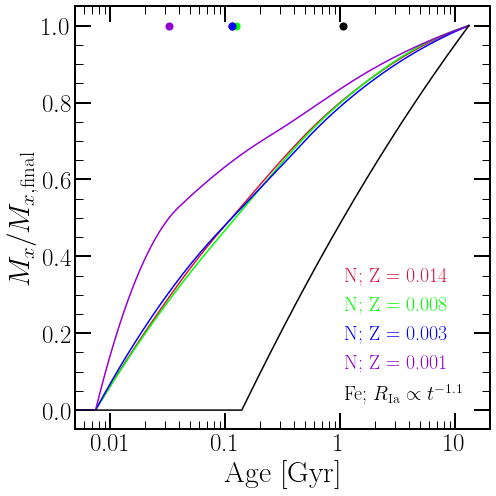

In [24]:
total_time = 13.2 # Gyr, total time to run SSP calculation for
ax = setup_axis_time() 
vice.yields.ccsne.settings['fe'] = 0.0 
vice.yields.sneia.settings['fe'] = 0.0017 
vice.yields.ccsne.settings['n'] = 0 
vice.yields.agb.settings['n'] = "cristallo11" 
metallicities = [0.014, 0.008, 0.003, 0.001] 
colors = ["crimson", "lime", "blue", "darkviolet"] 
for i in range(len(metallicities)): 
    mass, time = vice.single_stellar_population('n', Z = metallicities[i], 
        time = total_time, dt = 1.e-4) 
    mass = [_ / mass[-1] for _ in mass] 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "label": "N; Z = %g" % (metallicities[i]) 
    } 
    ax.plot(time, mass, **kwargs) 
    diff = [abs(_ - 0.5) for _ in mass] 
    idx = diff.index(min(diff)) 
    ax.scatter(time[idx], 1.0, c = plots.mpltoolkit.named_colors()[colors[i]], 
        marker = plots.mpltoolkit.markers()["circle"], s = 50) 
#     ax.plot(2 * [time[idx]], ax.get_ylim(), c = plots.mpltoolkit.named_colors()[colors[i]], 
#         linestyle = ':') 
mass, time = vice.single_stellar_population('fe', time = total_time) 
mass = [_ / mass[-1] for _ in mass] 
kwargs = {
    "c": plots.mpltoolkit.named_colors()["black"], 
    "label": r"Fe; $R_\text{Ia} \propto t^{-1.1}$" 
} 
ax.plot(time, mass, **kwargs) 
diff = [abs(_ - 0.5) for _ in mass] 
idx = diff.index(min(diff)) 
ax.scatter([time[idx]], 1.0, c = plots.mpltoolkit.named_colors()["black"], 
    marker = plots.mpltoolkit.markers()["circle"], s = 50)
# ax.plot(2 * [time[idx]], ax.get_ylim(), c = plots.mpltoolkit.named_colors()["black"], 
#     linestyle = ':') 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    fontsize = 20, handlelength = 0, bbox_to_anchor = (0.98, 0.02)) 
for i in range(len(metallicities)): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 
leg.legendHandles[i + 1].set_visible(False) 

# ax.plot(ax.get_xlim(), 2 * [0.5], c = plots.mpltoolkit.named_colors()["black"], 
#     linestyle = ':') 
    
plt.tight_layout() 
for ext in ["pdf", "png"]: plt.savefig("n_vs_fe_ssp_nocc.%s" % (ext)) 